* <font color="blue"> Dorian QUABOUL 3872944 </font>
* <font color="blue"> Wenshan WU 3874034 </font>

# TME4: Frequency filtering, color

In [1]:
import numpy as np
from numpy.fft import fft2,ifft2,fftshift
import matplotlib.pyplot as plt
from PIL import Image

def imshow(I,title=None,size=500):
    """ display an image with a specific size """
    plt.figure(figsize=(size//80,size//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()

In [2]:
def computeFT(I):
    """ Array -> Array[complex] """
    return fft2(I)

def toVisualizeFT(If):
    """ Array[complex] -> Array[float] """
    return fftshift(abs(If))

def toVisualizeLogFT(If):
    """ Array[complex] -> Array[float] """
    return fftshift(np.log(1+abs(If)))

In [3]:
def computeHistogram(I):
    """ Array -> list[int] """
    histogram = np.zeros(256)
    
    for i in range(len(histogram)) :
        histogram[i] = np.where(I == i, 1, 0).sum()
        
    return histogram


## Exercice 1 - Frequency filtering

1. Compute than display the centered module of Fourier transform of image `img/mandrill.png` (use functions seen in previous lessons). 

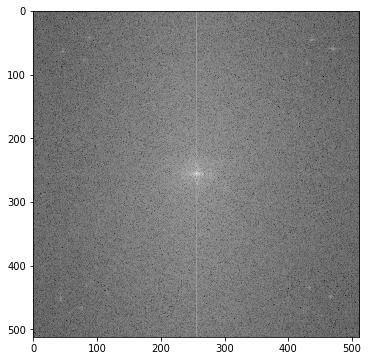

In [3]:
# Ouverture image mandrill
mandrill = np.array(Image.open('img/mandrill.png'))

# Calcul TF de mandrill
mandrill_TF = computeFT( mandrill )

# Affichage du module centré de la TF
imshow( toVisualizeLogFT( mandrill_TF ) )

2. Write a function `idealLowPassFilter(n,m,fc)` returning an ideal low pass filter with frequency cutoff $f_c$ and size $n\times m$. Recall: this function set to 1 pixels at distance $f_c$ from the center (null frequency).

In [6]:
def idealLowPassFilter(n,m,fc) :
    
    filtre = np.zeros((n,m))
    
    u = int( n / 2 )
    v = int( m / 2 )
    
    # Gestion de la range dans le for
    if n%2 == 0:
        u2 = u
    else: # cas où n est impair
        u2 = u + 1 # Ajout 1 car sinon il va nous manquer une valeur
        
    if m%2 == 0:
        v2 = v
    else: # cas où m est impair
        v2 = v + 1
    
    for i in range(-u,u2):
        for j in range(-v,v2):
            if np.sqrt(i**2 + j**2) <= fc:
                filtre[i+u, j+v] = 1
                
    return filtre

In [5]:
# Test de la fonction idealLowPassFilter
print( idealLowPassFilter( 5, 5, 2) )

[[0. 0. 1. 0. 0.]
 [0. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 0.]
 [0. 0. 1. 0. 0.]]


3. Write a function `lowPass(I,fc)` performing a low pass filtering of an image $I$. The function should
 - compute the centered Fourier transform of $I$
 - multiply point-by-point the spectrum with the ideal low filter produced by `idealLowPassFilter()`
 - uncenter the filtered spectrum and apply the inverse Fourier transform (function `ifft2()` from module `numpy.fft`
 - return the real part of filtered image

In [8]:
def lowPass(I, fc):
    # Calcul de la TF de I
    I_TF = computeFT( I )
    
    # Définition du filtre passe-bas idéal
    n, m = I.shape
    filtre = idealLowPassFilter( n, m, fc )
    
    # Multiplication terme à terme du spectre de la TF de I avec le filtre
    Spectre_filtre = fftshift( I_TF ) * filtre
    
    # TF inverse du spectre filtré
    Img_filtree = ifft2( Spectre_filtre )
    
    return abs( Img_filtree ) # retourne la partie réelle de l'image filtrée

4. Experiment this function on `img/mandrill.png` and `img/lena.jpg` with various values of cut off $f_c$.
 - give two effects that appears when $f_c$ decreases,
 - propose two applications of this filtering.


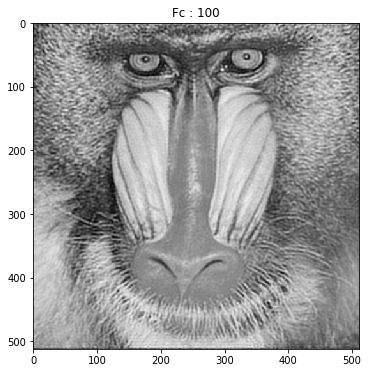

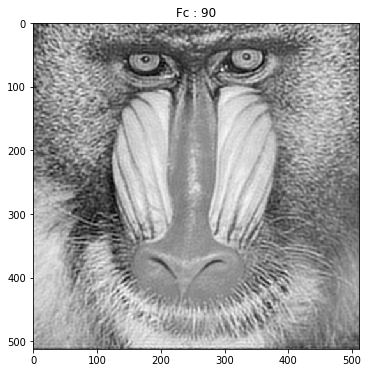

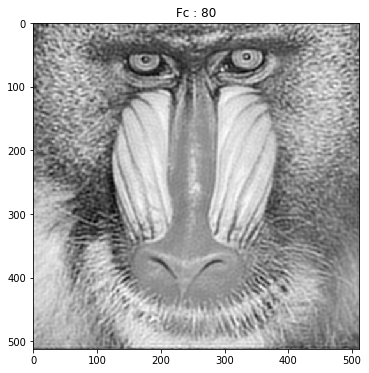

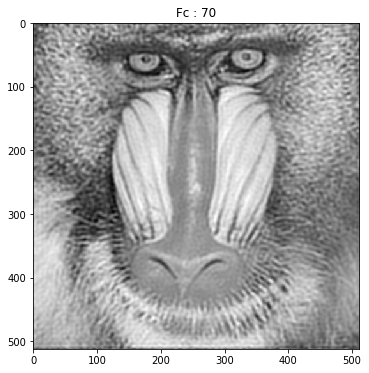

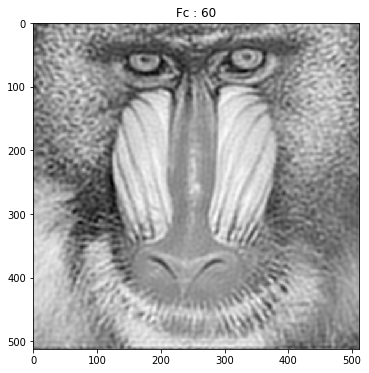

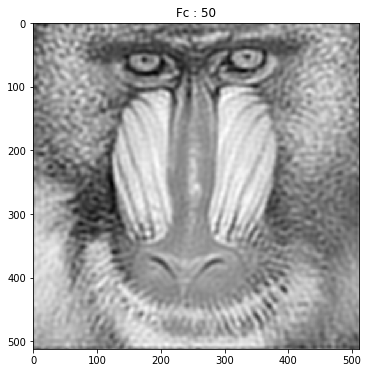

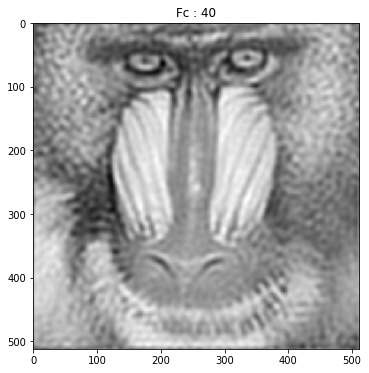

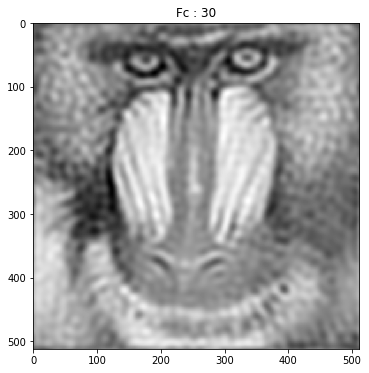

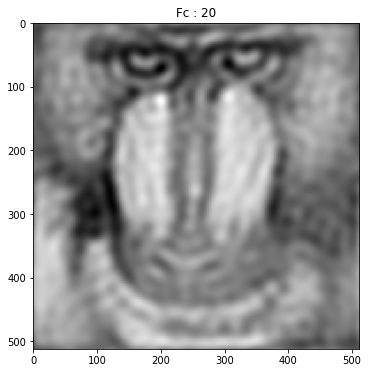

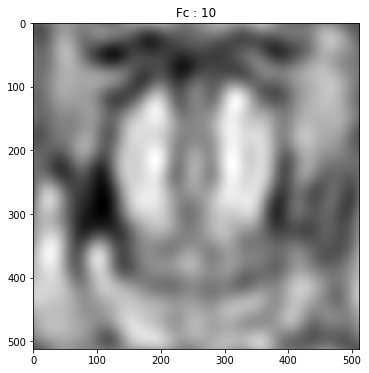

In [9]:
# Test du filtre passe-bas sur l'image mandrill
for i in range(100,0,-10):
    imshow( lowPass( mandrill, i ), "Fc : "+str( i ) )

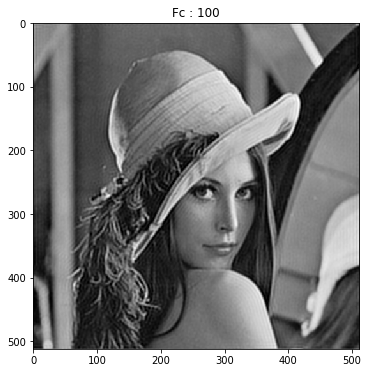

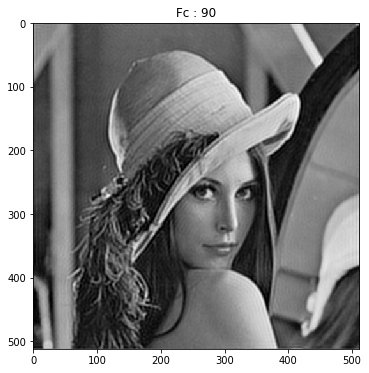

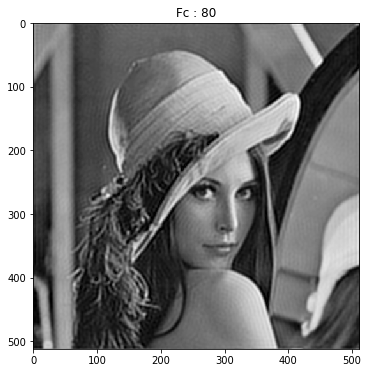

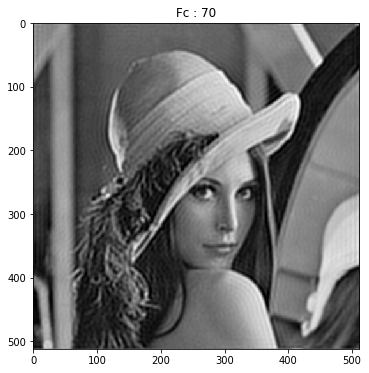

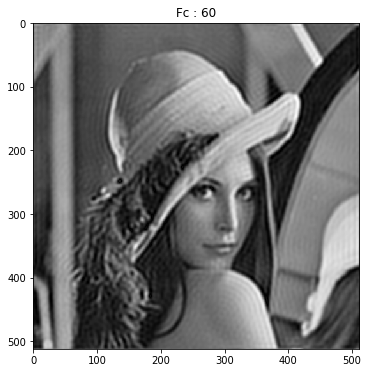

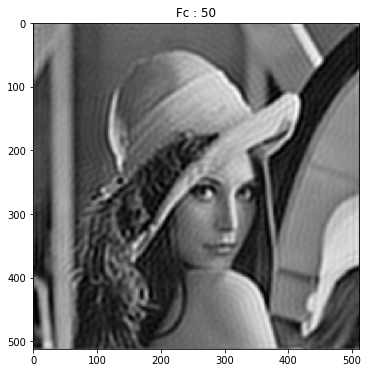

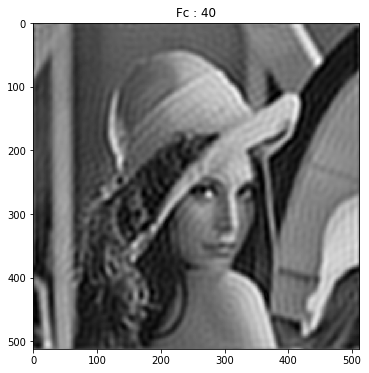

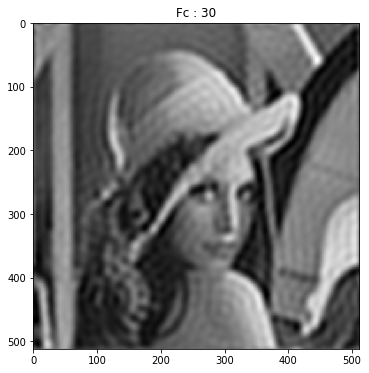

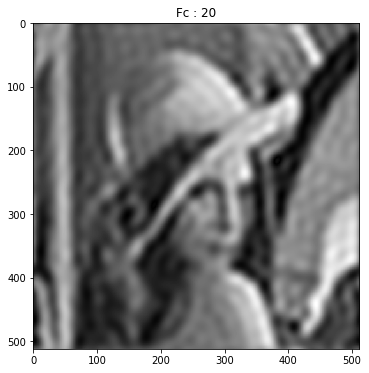

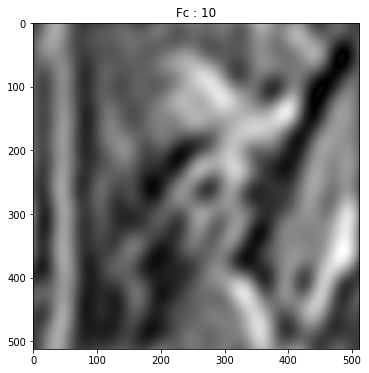

In [12]:
# Test du filtre passe-bas sur l'image lena
lena = np.array(Image.open('img/lena.jpg'))
for i in range( 100, 0, -10 ):
    imshow( lowPass( lena, i ), "Fc : "+str( i ) )

* <font color="red"> Plus la fréquence de coupure diminue plus on voit apparaitre sur l'image un phénomène d'oscillations (rebonds), plus connu sous le nom de phénomène de Gibbs, l'image se retrouve également floutée de sorte à rendre les détails invisibles </font>
* <font color="red"> Le filtre passe-bas permet de laisser passer les basses fréquences, il est par exemple utilisé dans les amplificateurs audio pour limiter la fréquence d'entrée maximale ou bien dans l'imagerie pour réduire le bruit </font>  

## Exercice 2 -  Linear filtering (convolution)

1. Given a kernel convolution of size $d\times d$, $d$ being odd. How many lines and columns should be added to each side of the image to apply this filter? The image is supposed surrounded by zero values.

d/2 lignes d/2 colonnes en plus de chaques côté

2. Write a function `imagePad(I,h)` getting an image and a kernel, returning a new image padded with zeros according to question 1.

In [17]:
def imagePad(I,h) :
    l,c = I.shape
    
    # Nombre de lignes/cols à rajouter de part et d'autre
    d = int( h.shape[0] / 2 )
    
    # Zéros à rajouter au niveau des colonnes
    v1 = np.zeros( ( d , c ) )
    
    I_2 = np.concatenate( ( v1, I ) )
    
    I_3 = np.concatenate( ( I_2, v1 ) )

    # Zéros à rajouter au niveau des lignes
    v2 = np.zeros( ( I_3.shape[0], d ) )
    
    I_4 = np.concatenate( ( v2, I_3 ), axis = 1 )
    I_5 = np.concatenate( ( I_4, v2 ) , axis = 1 )
    
    return I_5

In [18]:
# Test de la fonction imagePad
tab = np.array( [ [ 1, 2, 3 ], [ 4, 5, 6 ], [ 7, 8, 9 ] ] )
imagePad( tab, tab )

array([[0., 0., 0., 0., 0.],
       [0., 1., 2., 3., 0.],
       [0., 4., 5., 6., 0.],
       [0., 7., 8., 9., 0.],
       [0., 0., 0., 0., 0.]])

3. Write a function `conv2(I,h)` getting an image and a kernel and returning the convolution of $I$ by $h$. The function should return an image having the same shape than $I$. It is not allowed to use a module implementing the convolution.

In [20]:
def conv2(I, h):
    
    n, m = I.shape
    d = int( h.shape[0] / 2 )
    
    # Convolution de I par h
    convo = np.zeros( I.shape )
    
    # Rotation 180 degrés du filtre
    h_rotate = np.rot90( h, 2 )
    
    # Image rembourrée de zéros
    I_padded = imagePad( I, h )
    
    for i in range( d, d + n ):
        for j in range( d, d + m ):
            convo[i - d][j - d] = np.sum( I_padded[ i - d : i + d + 1, j - d : j + d + 1 ] * h_rotate )
            
    return convo

4. Try this function on mean filter of size $3\times3$, $5\times 5$ and $7\times 7$. Discuss the results.

In [ ]:
from scipy.signal import convolve2d
### your answer that below

for i in range(1,31,2):
    filre = np.ones( ( i, i ) ) * ( 1 / i**2 )
    imshow( conv2( mandrill, filre ), "Filtre taille : "+str( i ) )


* <font color="red"> Plus la taille du filtre est grande plus le lissage sur l'image est important et donc plus cette dernière perd en détails. </font>

5. Display the transfert function of these mean filters. For a better visualization, use the zero-padding technique to obtain a filter with a large size (for instance $256\times 256$). Use `imshow()` and `toVisualizeLogFT()`.

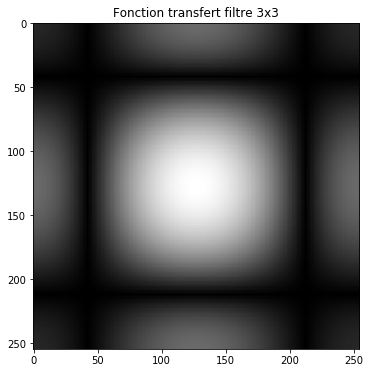

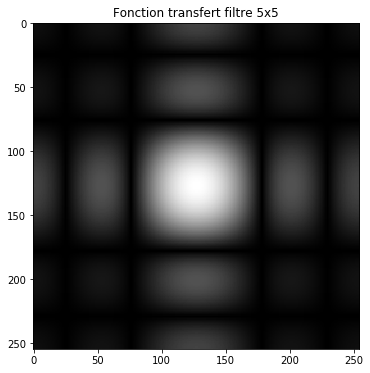

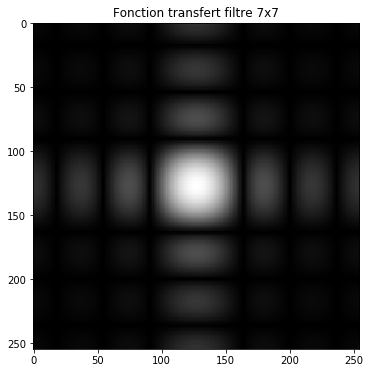

In [24]:
# Fonction transfert des filtres
mean3_filter = np.ones((3,3)) * (1/3**2)
mean5_filter = np.ones((5,5)) * (1/5**2)
mean7_filter = np.ones((7,7)) * (1/7**2)

padded3 = imagePad( mean3_filter, np.zeros( ( 253, 253 ) ) )
padded5 = imagePad( mean5_filter, np.zeros( ( 251, 251 ) ) )
padded7 = imagePad( mean7_filter, np.zeros( ( 249, 249 ) ) )

imshow( toVisualizeLogFT( computeFT( padded3 ) ), "Fonction transfert filtre 3x3" )
imshow( toVisualizeLogFT( computeFT( padded5 ) ), "Fonction transfert filtre 5x5" )
imshow( toVisualizeLogFT( computeFT( padded7 ) ), "Fonction transfert filtre 7x7" )

6. Interpretation: what the analytic expression of the transfert function of a mean filter. Is  it an ideal low pass filter?

C'est un sinus cardinal 2d (produit cartésien de deux sinus cardinaux). Non le filtre n'est pas idéal, car à support fréquentiel non borné.

7. Bonus question: perform the same study for the Gaussian kernel. Determine sigma in order to have filter of size $3\times3$, $5\times5$, and $7\times7$.

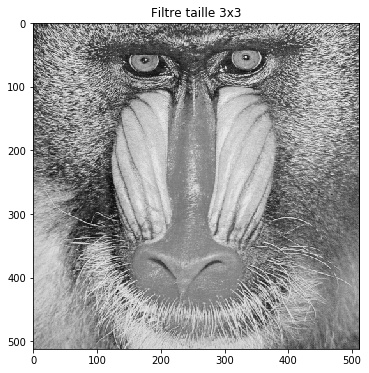

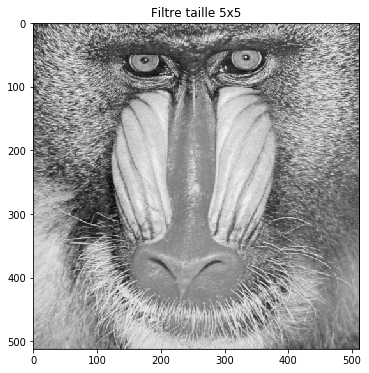

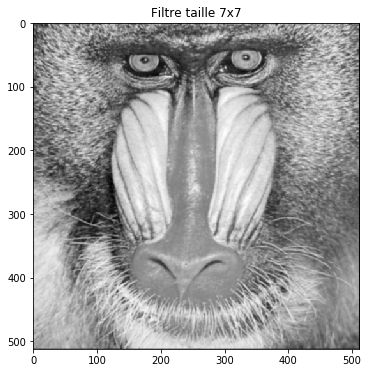

In [26]:
def gaussianKernel(sigma):
    """ double -> Array
        return a gaussian kernel of standard deviation sigma
    """
    n = 2*np.ceil(3*sigma) + 1
    x,y = np.meshgrid(np.arange(-n//2,n//2),np.arange(-n//2,n//2))
    return  np.exp( (-x**2-y**2)/(2*sigma*sigma))

### your answer start below

# Pour un filtre 3x3, il faut que ceil(3*sigma) = 1 donc sigma doit être compris entre 0 et 0.33
sigma3 = 0.2

# Pour un filtre 5x5, il faut que ceil(3*sigma) = 2 donc sigma doit être compris entre 0.33 et 0.66 
sigma5 = 0.5

# Pour un filtre 7x7, il faut que ceil(3*sigma) = 3 donc sigma doit être compris entre 0.66 et 1
sigma7 = 0.9

imshow( conv2( mandrill, gaussianKernel( sigma3 ) ), "Filtre taille 3x3" )
imshow( conv2( mandrill, gaussianKernel( sigma5 ) ), "Filtre taille 5x5" )
imshow( conv2( mandrill, gaussianKernel( sigma7 ) ), "Filtre taille 7x7" )


## Exercice 3: anti aliasing filtering

1. Give a code that subsamples of factor 2 (use function `subSample2()` given in TME3) the image `img/barbara.png`.

In [29]:
def subSample2(I):
    #Array -> Array
    return I[::2,::2]

barbara = np.array(Image.open('img/barbara.png'))

2. Give a code that subsamples of factor 2 (use function `subSample2()`) the image `img/barbara.png` after applying an low pass filter (use `antiAliasingFilter()`). As comment, recall the principle of filtering in the frequency domain.

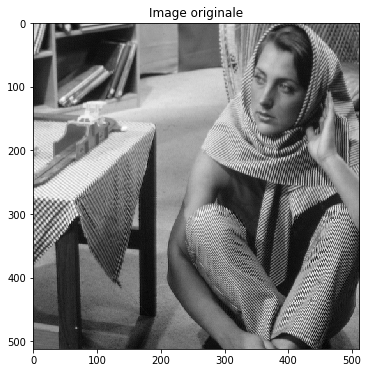

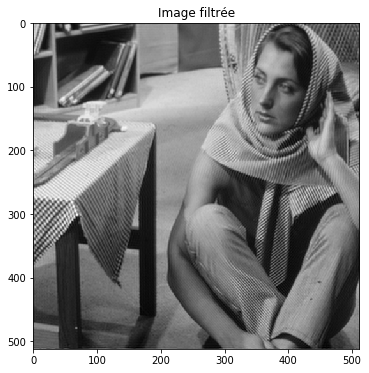

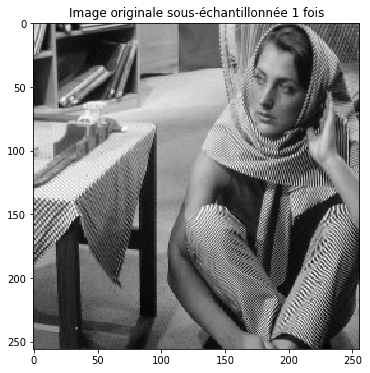

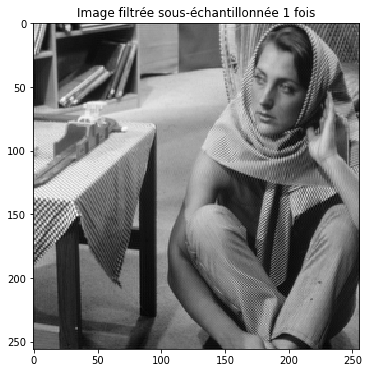

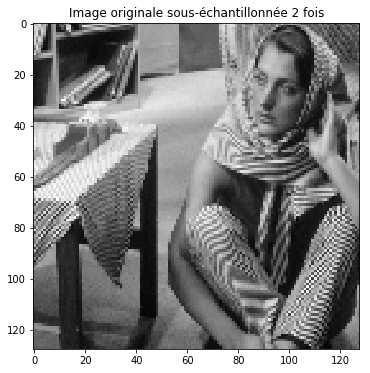

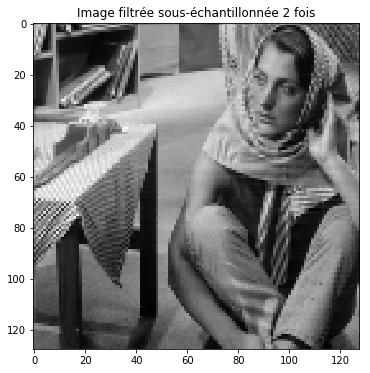

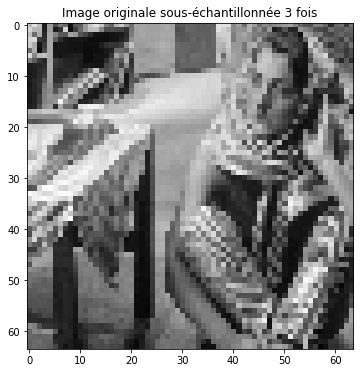

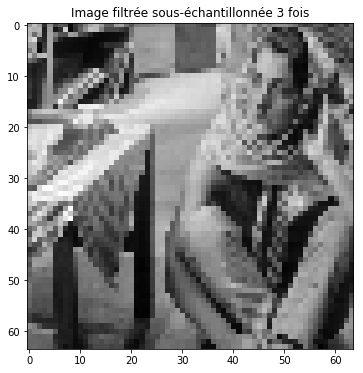

In [33]:
def antiAliasingFilter(n,m):
    """ int*int -> Array """
    n2, m2 = n//2, m//2
    rn, rm = n//4, m//4
    A = np.zeros((n, m))
    A[rn:rn+n2, rm:rm+m2] = 1
    return A

### your answer start below

## Principales étapes du filtrage dans le domaine fréquentielle
# 1. Calculer la TF du signal à filtrer
# 2. calculer la TFD du filtre
# 3. Multiplier les spectres issus des TF précédentes
# 4. Obtenir le signal filtré en passant par la TF inverse du spectre

# Etape 1
barbara_TF = computeFT( barbara )

# Etape 2
n, m = barbara.shape
filtre = antiAliasingFilter( n, m )

# Etape 3
spectre_filtre = fftshift( barbara_TF ) * filtre

# Etape 4
barbara_filtre = abs( ifft2 ( spectre_filtre ) )

imshow( barbara, "Image originale" )
imshow( barbara_filtre, "Image filtrée" )

for i in range(3):
    new_barbara = subSample2( barbara )
    new_barbara_filtre = subSample2( barbara_filtre )
    
    imshow( new_barbara, "Image originale sous-échantillonnée "+str( i+1 )+" fois" )
    imshow( new_barbara_filtre, "Image filtrée sous-échantillonnée "+str( i+1 )+" fois" )

    barbara = new_barbara
    barbara_filtre = new_barbara_filtre


3. Describe and analyze the filtering of Barbara with and without the anti aliasing filter. What information is lost for the two filtered images ?

* <font color="red"> Les effets du filtre permettent d'atténuer les hautes fréquences au niveau des contours et donc de retirer l'effet d'aliasing comme on peut le voir en comparant sur les images sans échantillonnage, de plus après avoir sous-échantillonné l'image filtrée on remarque encore la présence du filtre étant donné que les contours apparaissent encore visiblement comparé à l'image originale échantillonnée </font>
* <font color="red"> On perd l'information sur les hautes fréquences </font>

## Exercice 4: color image
1. Read images `img/clown.bmp` and `img/clown_lumi.bmp` as two arrays named $I_1$ and $I_2$. Display these images examine their shape. What difference there are between them?

In [23]:
I1 = np.array(Image.open('img/clown.bmp'))
I2 = np.array(Image.open('img/clown_lumi.bmp'))
print(type(I1))
print( I1.shape )
# print( I2.shape )
# imshow( I1 )
# imshow( I2 )
print(I1)
print("--------")
print(I2)

<class 'numpy.ndarray'>
(512, 512, 3)
[[[122  26  40]
  [127  65  74]
  [124  31  52]
  ...
  [166  42  43]
  [169  66  54]
  [168  98 102]]

 [[124  33  42]
  [130  65  77]
  [127  39  61]
  ...
  [168  50  47]
  [167  65  59]
  [168  97  97]]

 [[126  38  46]
  [125  68  80]
  [123  43  59]
  ...
  [169  61  33]
  [172  66  54]
  [169  95  99]]

 ...

 [[ 87   6  26]
  [ 88   5  14]
  [ 83   8  31]
  ...
  [199 183 149]
  [202 184 151]
  [204 184 149]]

 [[ 86   7  29]
  [ 86   3  21]
  [ 86   7  29]
  ...
  [202 185 149]
  [202 184 144]
  [204 184 144]]

 [[ 86   8  32]
  [ 88   5  23]
  [ 89   7  27]
  ...
  [202 184 147]
  [200 181 145]
  [201 183 143]]]
--------
[[ 67  84  70 ...  89 100 119]
 [ 70  86  74 ...  93  99 118]
 [ 73  86  74 ...  96 101 117]
 ...
 [ 46  46  45 ... 183 185 184]
 [ 45  46  46 ... 186 184 184]
 [ 46  46  48 ... 184 182 182]]


* <font color="red"> L'une des différences réside dans la taille de l'image, celle de I1 est de dimension 3 ( 512 x 512 x 3 ) tandis que celle de I2 est de dimension 2 ( 512 x 512 ), et la deuxième différence concerne la coloration, celle de I1 est en couleur alors que I2 est en noir et blanc </font>

2. The first image is an array of dimension 3. Explain the signification of each dimension. From this image create 3 images $I_R$, $I_G$, $I_B$ of dimension 2. Display these three images and explain what you see.

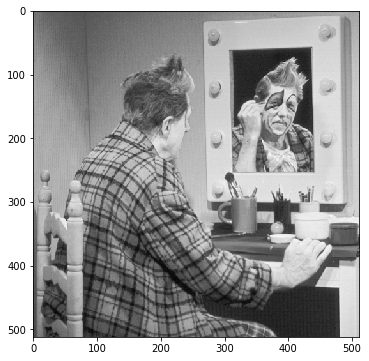

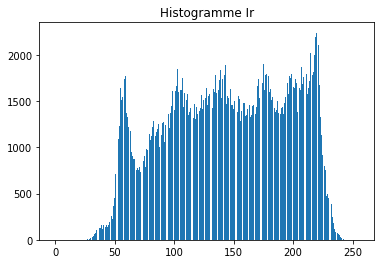

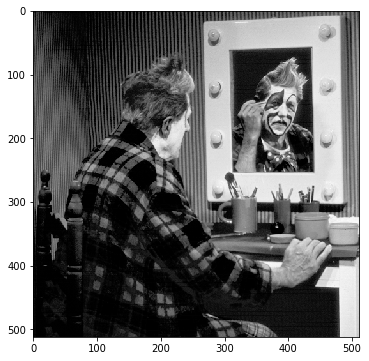

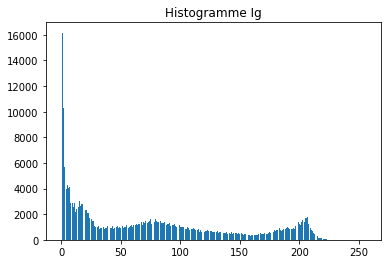

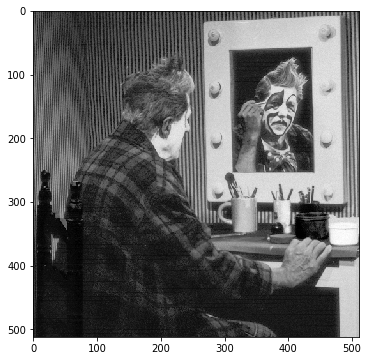

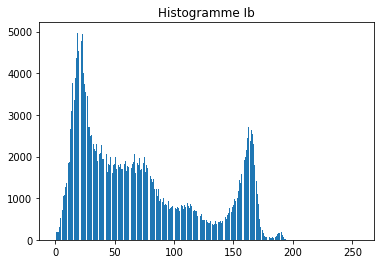

In [7]:
# Image red
Ir = I1[:,:,0]
imshow( Ir )
hist_ir = computeHistogram( Ir )
plt.bar( np.arange( len( hist_ir ) ), hist_ir )
plt.title( "Histogramme Ir" )
plt.show()

# Image green
Ig = I1[:,:,1]
imshow( Ig )
hist_ig = computeHistogram( Ig )
plt.bar( np.arange( len( hist_ig ) ), hist_ig )
plt.title( "Histogramme Ig" )
plt.show()

# Image blue
Ib = I1[:,:,2]
imshow( Ib )
hist_ib = computeHistogram( Ib )
plt.bar( np.arange( len( hist_ib ) ), hist_ib )
plt.title( "Histogramme Ib" )
plt.show()

* <font color="red"> Les deux premières dimensions représentent la taille de l'image (512x512) et la dernière dimension correspond aux 3 espaces de couleurs primaires du modèle RGB.</font>
* <font color="red"> Sur l'image Ir, on observe une répartition homogène de l'intensité des pixels comme on peut le voir sur son histogramme. On remarque que l'image est très claire donc que l'intensité de rouge est très forte. </font>
* <font color="red"> Les images Ig et Ib sont très sombres, on en déduit que les intensités de vert et de bleu sont faibles. </font>

3. Create a new image $I_3$ of dimensions 3, the first dimension contains the value of $I_R$, the second the value of $I_B$ and the third the values of $I_G$. Try another combinations. Remark: color images are better handled by `imshow()` if pixel values range in $[0,1]$.

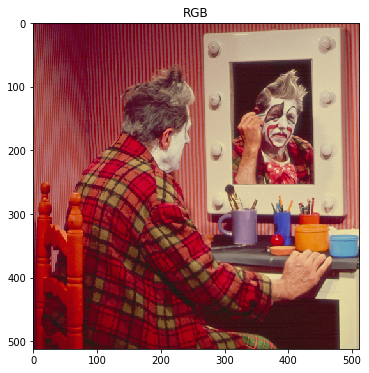

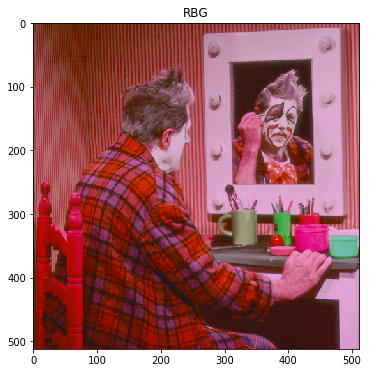

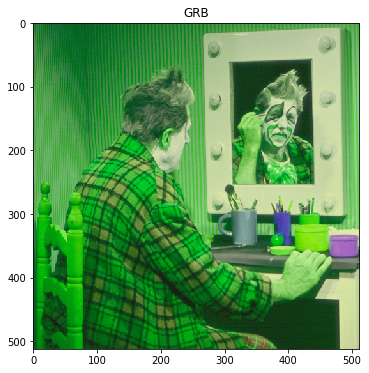

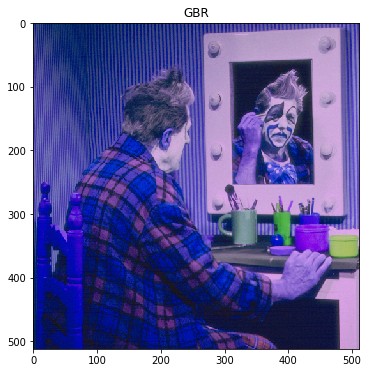

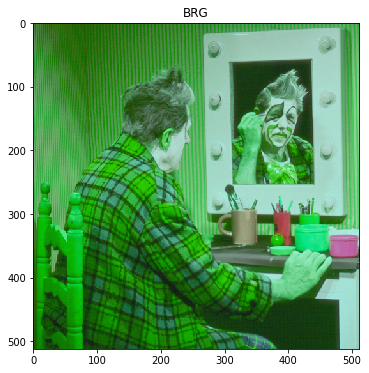

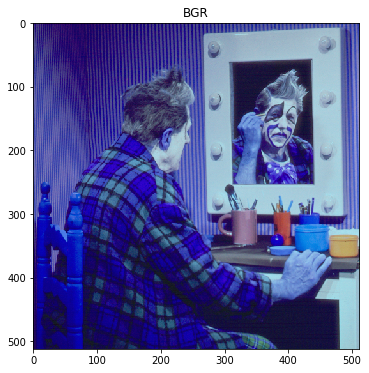

In [11]:
# Combinaisons possibles : RGB / RBG / GRB / GBR / BRG / BGR

I3 = I1.copy()

I3[:,:,0] = Ir 
I3[:,:,1] = Ig
I3[:,:,2] = Ib
imshow(I3, "RGB")

I3[:,:,0] = Ir 
I3[:,:,1] = Ib
I3[:,:,2] = Ig
imshow(I3, "RBG")

I3[:,:,0] = Ig 
I3[:,:,1] = Ir
I3[:,:,2] = Ib
imshow(I3, "GRB")

I3[:,:,0] = Ig 
I3[:,:,1] = Ib
I3[:,:,2] = Ir
imshow(I3, "GBR")

I3[:,:,0] = Ib 
I3[:,:,1] = Ir
I3[:,:,2] = Ig
imshow(I3, "BRG")

I3[:,:,0] = Ib 
I3[:,:,1] = Ig
I3[:,:,2] = Ir
imshow(I3, "BGR")

<font color="red">On observe une superposition d'images des différentes channels (R+G+B).
Sachant que le Rouge est prédominant dans l'image (haute valeur 
d'intensité), à chaque fois qu'on le déplacera dans un autre espace de couleur, la couleur de cet espace prédominera.
    
    
Exemple :</font>
- <font color="red">R à la place du B dans RGB : bleu prédominant (GBR / BGR)</font>
- <font color="red">R à la place du G dans RGB : vert prédominant (GRB / BRG)</font>

4. Write a code that allows the see the first channel with red colors, the second channel in green, and the blue channel in blue.

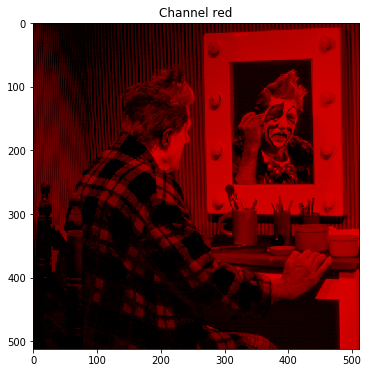

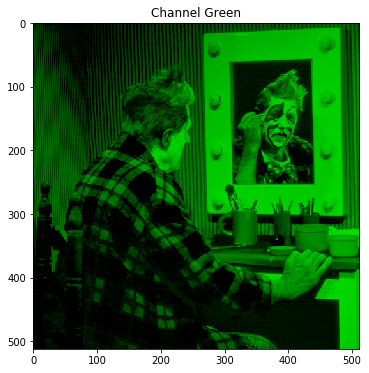

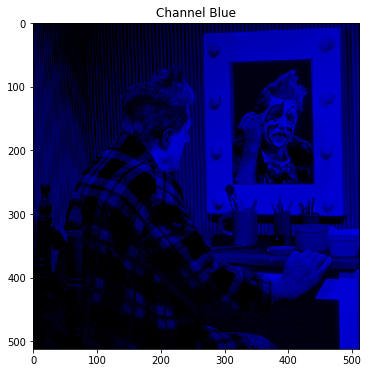

In [87]:
I1[:,:,0] = Ir
I1[:,:,1] = np.zeros((512,512))
I1[:,:,2] = np.zeros((512,512))

imshow(I1,"Channel red")

I1[:,:,0] = np.zeros((512,512))
I1[:,:,1] = Ig
I1[:,:,2] = np.zeros((512,512))

imshow(I1,"Channel Green")

I1[:,:,0] = np.zeros((512,512))
I1[:,:,1] = np.zeros((512,512))
I1[:,:,2] = Ib

imshow(I1,"Channel Blue")